In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.5 MB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 9.4 MB/s eta 0:00:01    |██████▉                         | 4.1 MB 9.4 MB/s eta 0:00:02
     |████████████████████████████████| 1.2 MB 4.9 MB/s eta 0:00:01     |██                              | 71 kB 10.0 MB/s eta 0:00:01


In [2]:
data_df=pd.read_csv('data.csv')
data_df.head(5)

,ISO Week of ISO Year,Default Channel Grouping,Sessions,leads,pageviews,platform,device
0,201711,Direct,"97,909",3492,"1,702,799",android,NaN
1,201710,Direct,"84,905",3262,"1,556,016",android,NaN
2,201712,Direct,"77,751",2465,"1,334,977",android,NaN
3,201715,Direct,"74,696",2858,"1,344,021",android,NaN
4,201713,Direct,"73,795",2973,"1,308,930",android,NaN


In [3]:
data_df.shape

(2073, 7)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ISO Week of ISO Year      2073 non-null   int64 
 1   Default Channel Grouping  2073 non-null   object
 2   Sessions                  2073 non-null   object
 3   leads                     2073 non-null   object
 4   pageviews                 2073 non-null   object
 5   platform                  2073 non-null   object
 6   device                    1468 non-null   object
dtypes: int64(1), object(6)
memory usage: 113.5+ KB


In [5]:
data_df["ISO Week of ISO Year"] = data_df["ISO Week of ISO Year"].astype(str)

In [6]:
data_df.describe()

,ISO Week of ISO Year,Default Channel Grouping,Sessions,leads,pageviews,platform,device
count,2073,2073,2073,2073,2073,2073,1468
unique,40,17,1517,456,1732,3,3
top,201740,Direct,36,0,0,web,mobile
freq,57,200,31,374,24,1468,510


In [7]:
data_df["Sessions"] = data_df.Sessions.str.split(',').str.join('').astype(int)
data_df["leads"] = data_df.leads.str.split(',').str.join('').astype(int)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ISO Week of ISO Year      2073 non-null   object
 1   Default Channel Grouping  2073 non-null   object
 2   Sessions                  2073 non-null   int64 
 3   leads                     2073 non-null   int64 
 4   pageviews                 2073 non-null   object
 5   platform                  2073 non-null   object
 6   device                    1468 non-null   object
dtypes: int64(2), object(5)
memory usage: 113.5+ KB


In [9]:
data_df.describe()

,Sessions,leads
count,2073.000000,2073.000000
mean,18450.894838,1017.460685
std,29086.278292,1747.243815
min,4.000000,0.000000
25%,825.000000,31.000000
50%,6144.000000,231.000000
75%,25433.000000,1227.000000
max,162511.000000,12438.000000


In [10]:
data_df = data_df.sort_values(by = "ISO Week of ISO Year")

In [11]:
data_df.head()

,ISO Week of ISO Year,Default Channel Grouping,Sessions,leads,pageviews,platform,device
80,201701,Email,13820,1388,"264,985",android,NaN
541,201701,Display,229,15,2751,ios,NaN
1545,201701,Display,2831,58,"25,151",web,tablet
1775,201701,Referral,589,0,5138,web,tablet
800,201701,Paid Search (Non-Brand),42855,1073,"212,709",web,mobile


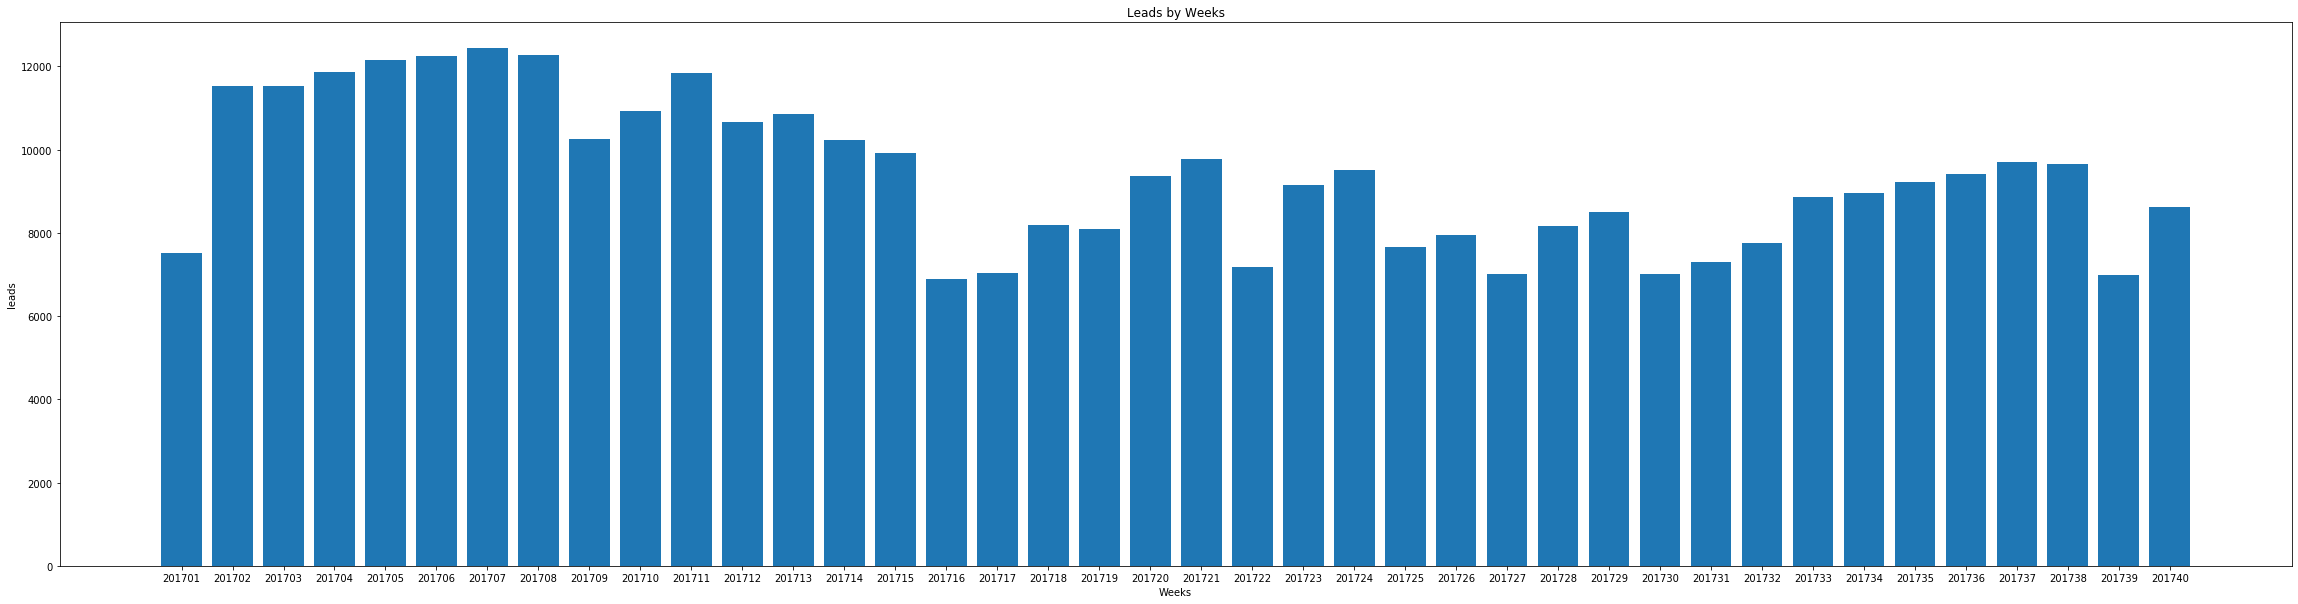

In [13]:
fig = plt.figure(figsize = (40, 10))

weeks = data_df['ISO Week of ISO Year']
leads = data_df["leads"]

plt.bar(weeks, leads)
 
plt.xlabel("Weeks")
plt.ylabel("leads")
plt.title("Leads by Weeks")
plt.show()

<Figure size 2880x720 with 0 Axes>

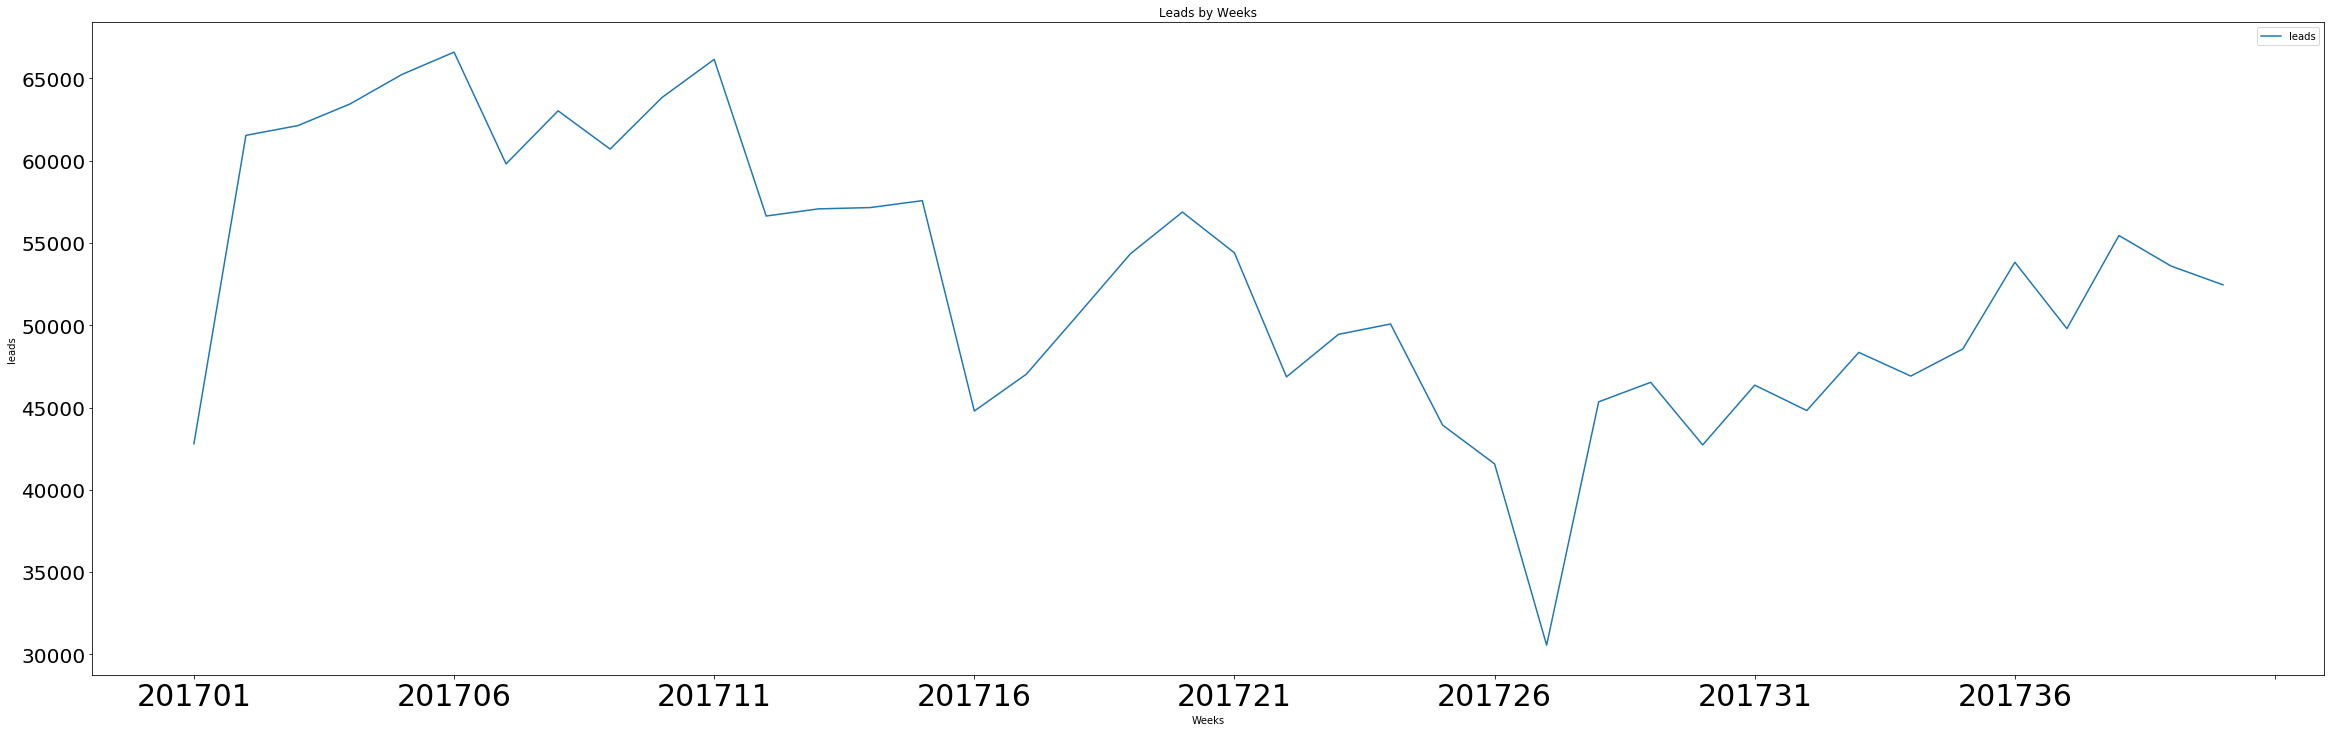

In [14]:
fig = plt.figure(figsize = (40, 10))

df_week = data_df.groupby('ISO Week of ISO Year')['leads'].sum().reset_index()
df_week.plot(x='ISO Week of ISO Year', y='leads',kind="line", figsize = (40, 12))

plt.xlabel("Weeks")
plt.xticks(fontsize=30)
plt.ylabel("leads")
plt.yticks(fontsize=20)
plt.title("Leads by Weeks")
plt.show()

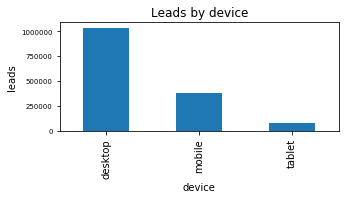

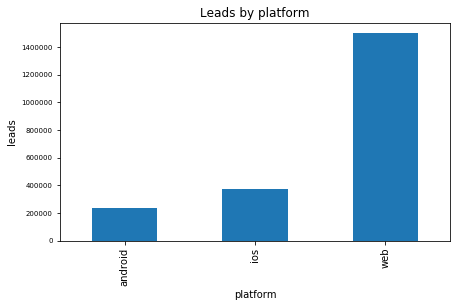

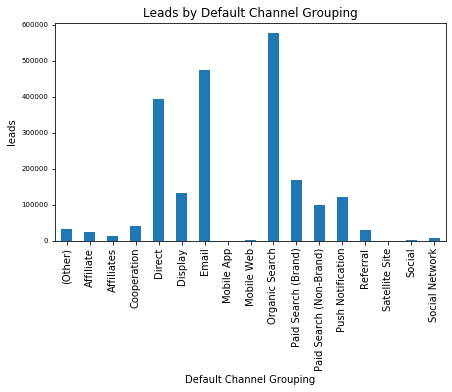

In [15]:
fig = plt.figure(figsize = (10, 5))

df_device = data_df.groupby('device')['leads'].sum()
df_device.plot(x='device', y='leads',kind="bar", figsize = (5, 2))

plt.xlabel("device")
plt.xticks(fontsize=10)
plt.ylabel("leads")
plt.yticks(fontsize=7)
plt.title("Leads by device")
plt.show()

df_platform = data_df.groupby('platform')['leads'].sum()
df_platform.plot(x='platform', y='leads',kind="bar", figsize = (7, 4))

plt.xlabel("platform")
plt.xticks(fontsize=10)
plt.ylabel("leads")
plt.yticks(fontsize=7)
plt.title("Leads by platform")
plt.show()


df_chgrp = data_df.groupby('Default Channel Grouping')['leads'].sum()
df_chgrp.plot(x='Default Channel Grouping', y='leads',kind="bar", figsize = (7, 4))

plt.xlabel("Default Channel Grouping")
plt.xticks(fontsize=10)
plt.ylabel("leads")
plt.yticks(fontsize=7)
plt.title("Leads by Default Channel Grouping")
plt.show()


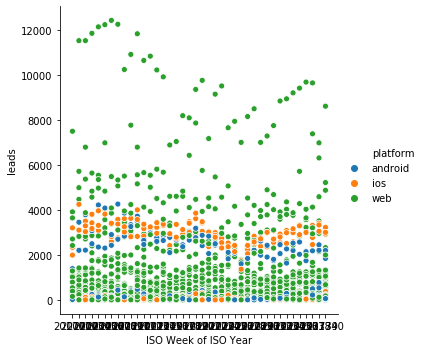

In [16]:
sns.relplot(x='ISO Week of ISO Year', y='leads', hue = 'platform', data = data_df);
# more leads received when used web platform,

<Figure size 720x360 with 0 Axes>

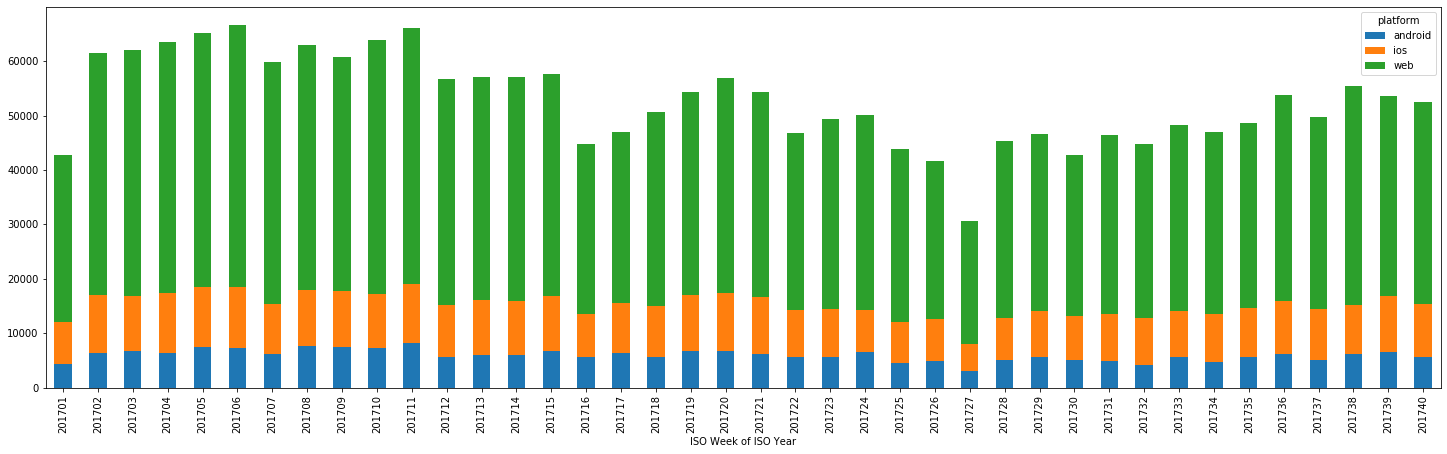

In [22]:
fig = plt.figure(figsize = (10, 5))

df_pltfrm = data_df.groupby(['ISO Week of ISO Year','platform'])['leads'].sum().unstack()
#df_pltfrm.sort_values(by = 'web', ascending = False)
df_pltfrm.plot(kind="bar",stacked=True, figsize = (25, 7))
plt.show()

<Figure size 720x360 with 0 Axes>

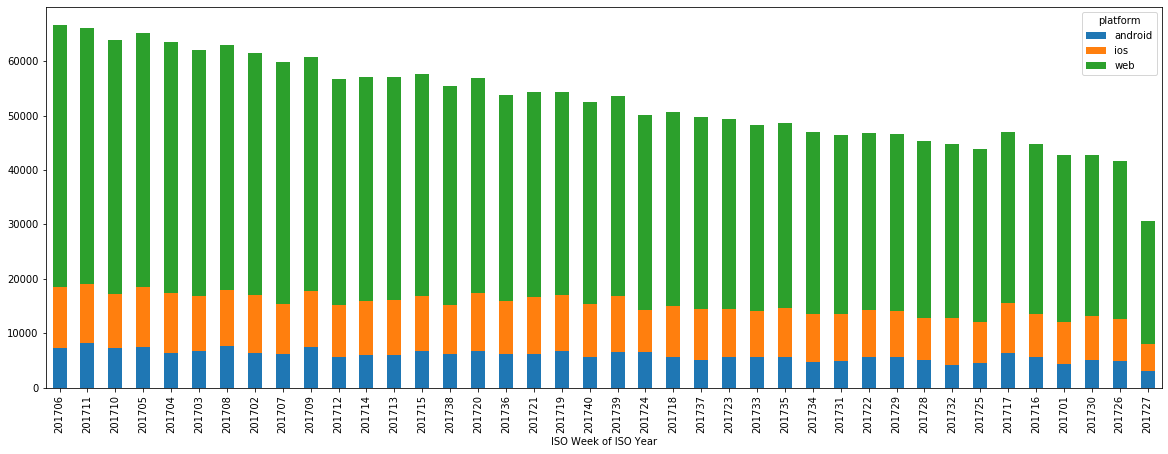

In [23]:
fig = plt.figure(figsize = (10, 5))

df_pltfrm = data_df.groupby(['ISO Week of ISO Year','platform'])['leads'].sum().unstack().sort_values(by = 'web', ascending = False)
#df_pltfrm.sort_values(by = 'web', ascending = False)
df_pltfrm.plot(kind="bar",stacked=True, figsize = (20, 7))
plt.show()

In [24]:
ios = data_df[data_df['platform'] == 'ios']

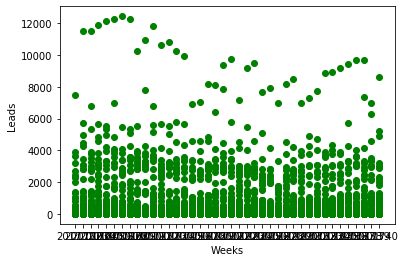

In [33]:
plt.xlabel('Weeks')
plt.ylabel('Leads')
plt.scatter(data_df['ISO Week of ISO Year'], data_df['leads'], color = 'green');

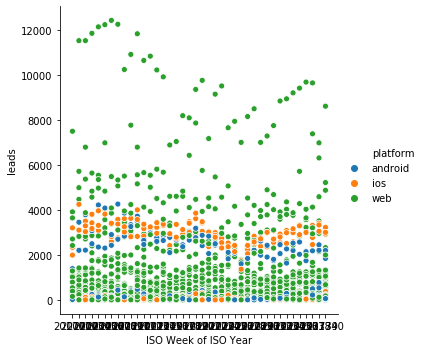

In [50]:
#sns.pairplot(data_df, x_vars=['ISO Week of ISO Year'], y_vars='leads', height=5, aspect=0.9, kind='reg')

sns.relplot(x='ISO Week of ISO Year', y='leads', hue = 'platform', data = data_df);